In [84]:
import os
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

os.chdir('C:\\Users\\dioni\\Desktop\\ISLR data')

# Ordinary least squares

In [11]:
boston_load = load_boston()
boston = pd.DataFrame(boston_load.data, columns = boston_load.feature_names)
boston_target = pd.DataFrame(boston_load.target, columns = ['medv'])

## Simple linear regression LSTAT parameter

In [12]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
boston_target.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


lstat = boston['LSTAT']
lstat = sm.add_constant(lstat)

### Fitting the data

In [94]:
linear_regressor = sm.OLS(boston_target['medv'], lstat)
linear_regression = linear_regressor.fit()
summary = linear_regression.summary()
print(linear_regression.summary())
print('Parameters: ', linear_regression.params)
print('R2: ', linear_regression.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.08e-88
Time:                        19:46:49   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

Get confidence interval(100 - alpha), same as in linear regression summary

In [16]:
linear_regression.conf_int(alpha = 0.05, cols = None)

,0,1
const,33.448457,35.659225
LSTAT,-1.026148,-0.873951


Make predictions on input data

In [17]:
X_pred = pd.DataFrame(data = [5, 10, 15], columns = ['LSTAT'])
X_pred = sm.add_constant(X_pred)
prediction = linear_regression.get_prediction(X_pred)
prediction_summary = prediction.summary_frame(alpha = 0.05)
print(prediction_summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  29.803594  0.405247      29.007412      30.599776     17.565675   
1  25.053347  0.294814      24.474132      25.632563     12.827626   
2  20.303101  0.290893      19.731588      20.874613      8.077742   

   obs_ci_upper  
0     42.041513  
1     37.279068  
2     32.528459  


Values from prediciton summary and their meaning

In [18]:
mean = prediction_summary['mean'] #mean values of the prediction, centres of the prediction and confidence intervals
mean_se = prediction_summary['mean_se'] #mean values for standard error
mean_ci_lower = prediction_summary['mean_ci_lower'] #lower bound of the 95% confidence interval associated with lstat values of 5,10,15
mean_ci_upper = prediction_summary['mean_ci_upper'] #upper bound of the 95% confidence interval


Confidence interval predicts where a true regression mean would be, and prediction interval predicts value for an unobserved data point. Prediction intervals are wider as they include the standard error

In [19]:
#prediction interval predicts values for an unobserved data point  
obs_ci_lower = prediction_summary['obs_ci_lower']
obs_ci_upper = prediction_summary['obs_ci_upper']

### Linear regression plot plot through seaborn

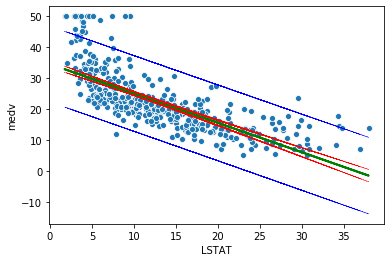

In [22]:
fitted_values = linear_regression.get_prediction(lstat).summary_frame(alpha = 0.05) #returns the mean predictions for X values
#fitted values are also available through linear_regression.fittedvalues
sns.scatterplot(x = lstat['LSTAT'], y = boston_target['medv'])
plt.plot(lstat['LSTAT'], fitted_values['mean'], linestyle = '-', lw = 2, color = 'g', ) #OLS regression line
#plot confidence and prediction intervals
plt.plot(lstat['LSTAT'], fitted_values['mean_ci_lower'], linestyle = '--', lw = 0.5, color = 'r')
plt.plot(lstat['LSTAT'], fitted_values['mean_ci_upper'], linestyle = '--', lw = 0.5, color = 'r')
plt.plot(lstat['LSTAT'], fitted_values['obs_ci_lower'], linestyle = '--', lw = 0.5, color = 'b')
plt.plot(lstat['LSTAT'], fitted_values['obs_ci_upper'], linestyle = '--', lw = 0.5, color = 'b')
plt.show()

### Alternative linear regression plot through statsmodels

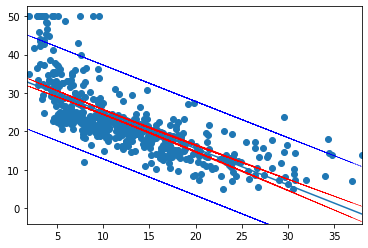

In [23]:
fig = sm.graphics.abline_plot(model_results=linear_regression)
ax = fig.axes[0]
ax.scatter(lstat['LSTAT'], boston_target['medv'])
ax.margins(.1)
plt.plot(lstat['LSTAT'], fitted_values['mean_ci_lower'], linestyle = '--', lw = 0.5, color = 'r')
plt.plot(lstat['LSTAT'], fitted_values['mean_ci_upper'], linestyle = '--', lw = 0.5, color = 'r')
plt.plot(lstat['LSTAT'], fitted_values['obs_ci_lower'], linestyle = '--', lw = 0.5, color = 'b')
plt.plot(lstat['LSTAT'], fitted_values['obs_ci_upper'], linestyle = '--', lw = 0.5, color = 'b')
plt.show()

### Residuals plots to identify influential points

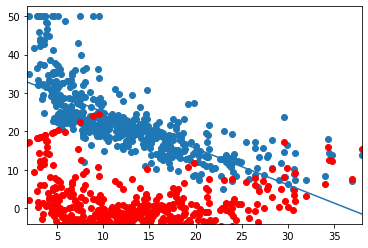

In [24]:
residuals = linear_regression.resid

fig = sm.graphics.abline_plot(model_results=linear_regression)
ax = fig.axes[0]
ax.scatter(lstat['LSTAT'], boston_target['medv'])
ax.margins(.1)
ax.scatter(lstat['LSTAT'], residuals, color = 'r') #add residuals to the plot
plt.show() 

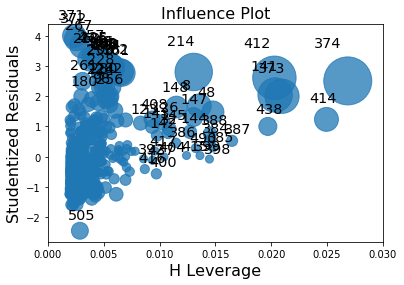

In [25]:
#get stundentized residuals from influence
infl = linear_regression.get_influence().summary_frame()
influence_plot(linear_regression) #Levarage vs stundentized residuals
plt.xlim(0, 0.03) #desno su high leverage pointovi
plt.show()

High leverage points can be identified by cooks distance

In [26]:
infl['cooks_d'].max()

0.08616205140775535

Cooks distance is calculated by removing the i data point and recalculating the regression. It summarizes how much all the values in the regression model change when the i observation is removed. Values that are considered influential are higher than 1, or 4/N, or 4/(N-k-1), where N is number of observations and k is the number of explanatory variables. But general rule is that high cooks_d are values that are significantlly higher than the rest.

# Multiple linear regression

LSTAT + AGE

In [30]:
X = pd.DataFrame(data = [boston['LSTAT'],  boston['AGE']]).T
X = sm.add_constant(X)
multi_lin_regressor = sm.OLS(boston_target, X)
multi_lin_regression = multi_lin_regressor.fit()

In [31]:
print(multi_lin_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.98e-88
Time:                        18:03:53   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

Fitting the model on all variables

In [42]:
X_all = sm.add_constant(boston)
multi_lin_regressor_all = sm.OLS(boston_target, X_all)
multi_lin_regression_all = multi_lin_regressor_all.fit()

In [43]:
multi_lin_regression_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 06 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        18:18:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculating variance inflation factor -> shows multicollinearity, if it is higher than 5 or 10 then the variable is highly multicollinear

In [69]:
vif = pd.Series([variance_inflation_factor(X_all.values, i) for i in range(X_all.shape[1])], index = X_all.columns)
vif > 

const      585.265238
CRIM         1.792192
ZN           2.298758
INDUS        3.991596
CHAS         1.073995
NOX          4.393720
RM           1.933744
AGE          3.100826
DIS          3.955945
RAD          7.484496
TAX          9.008554
PTRATIO      1.799084
B            1.348521
LSTAT        2.941491
dtype: float64

TAX, RAD  have values higher than 5, and AGE has a pretty high p-value

In [75]:
X_all = sm.add_constant(boston)
X_all.drop(columns = ['AGE'], inplace = True)
multi_lin_regressor_all = sm.OLS(boston_target, X_all)
multi_lin_regression_all = multi_lin_regressor_all.fit()
multi_lin_regression_all.summary()                  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 06 Oct 2019   Prob (F-statistic):          6.08e-136
Time:                        18:49:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4369      5.080      7.172      0.000      26.456      46.418
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
B              0.0093      0.003      3.481      0.001       0.004       0.015
LSTAT         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interaction terms multiple linear regression

":" in the intercation term gives just the interaction, only one independent variable which is the multiplication of the two variables

'*' in the interaction term gives tree independent variables, multiplication of the two + each of the two variables

In [82]:
boston_data = boston.copy()
boston_data['medv']= boston_target['medv']
boston_data = sm.add_constant(boston_data)

In [86]:
interaction_regressor = smf.ols("medv ~ LSTAT * AGE", data = boston_data)
interaction_regression = interaction_regressor.fit()
print(interaction_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.86e-88
Time:                        19:04:05   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### Non-linear transformation of the Predictors

In [93]:
non_linear_regressor = smf.ols("medv ~ LSTAT + I(LSTAT**2)", data = boston_data)
non_linear_regression = non_linear_regressor.fit()
print(non_linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):          1.56e-112
Time:                        19:38:15   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

The quadratic term has much lower standard error which could suggest that it would be better for the model. We can do ANOVA for quantifying if quadratic fit is superior

In [101]:
anova = sm.stats.anova_lm(linear_regression, non_linear_regression)

In [102]:
anova

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


# Qualitative predictors

In [126]:
car_seats = pd.read_csv('Carseats.csv')
car_seats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [128]:
car_seats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [127]:
all_columns = "+".join(car_seats.drop(columns = ['Sales']).columns)
formula = "Sales ~" + all_columns

In [133]:
car_seats_regressor = smf.ols(formula = (formula + "+Income:Advertising + Price:Age"), data = car_seats)
car_seats_regression = car_seats_regressor.fit()
print(car_seats_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 06 Oct 2019   Prob (F-statistic):          6.14e-166
Time:                        20:20:19   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    